In [119]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree as plt_tree

df = pd.read_csv("../DATA/stunting.csv")

# Data Preprocessing

In [120]:
df.isnull().sum()

df.duplicated().sum()

df = df.drop_duplicates()

df = df.dropna()


In [121]:
df = df.rename(
    columns={
        "Jenis Kelamin": "jenis_kelamin",
        "Umur (bulan)": "umur_bulan",
        "Tinggi Badan (cm)": "tinggi_cm",
        "Berat Badan (kg)": "berat_kg",
        "Stunting": "stunting",
        "Wasting": "wasting",
    }
)

# Data Understanding EDA (Exploratory Data Analysis)

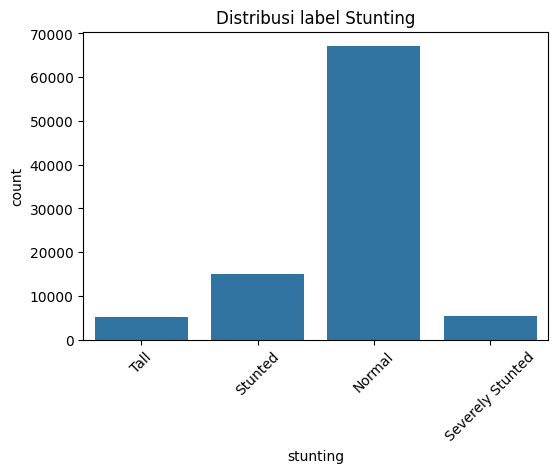

In [122]:
plt.figure(
    figsize=(6, 4)
)
sns.countplot(
    x="stunting", data=df
)
plt.title("Distribusi label Stunting")
plt.xticks(rotation=45)
plt.show()

# Encoding Data Kategorikal

In [123]:
stunting_cat = df["stunting"].astype("category")
stunting_classes = stunting_cat.cat.categories
df["stunting"] = stunting_cat.cat.codes

for col in ["jenis_kelamin", "wasting"]:
    if col in df.columns:
        df[col] = df[col].astype("category").cat.codes

df.head()

,jenis_kelamin,umur_bulan,tinggi_cm,berat_kg,stunting,wasting
0,0,19,91.6,13.3,3,1
1,0,20,77.7,8.5,2,3
2,0,10,79.0,10.3,0,1
3,1,2,50.3,8.3,1,1
4,1,5,56.4,10.9,1,1


# Korelasi Antar Fitur

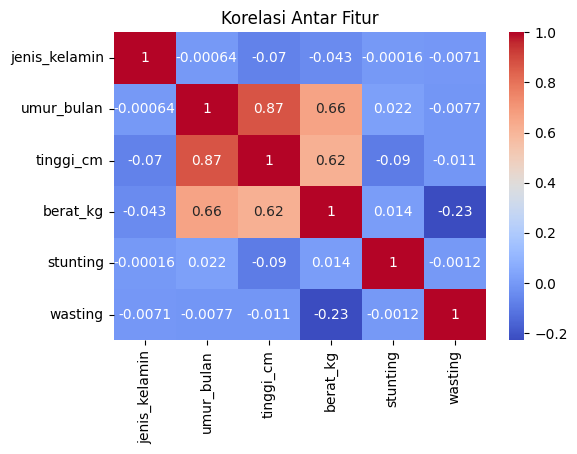

In [124]:
plt.figure(
    figsize=(6, 4)
)
sns.heatmap(
    df.corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Korelasi Antar Fitur")
plt.show()

# Spliting Data

In [125]:

feature_cols = ["umur_bulan", "tinggi_cm", "berat_kg", "wasting"]
target_col = "stunting"
X = df[feature_cols]
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)


(74153, 18539)

# Pembuatan Model Decision Tree

In [126]:
dt = DecisionTreeClassifier(
    criterion="gini", random_state=42,
    max_depth=4,
)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Evaluasi Model

In [127]:
y_pred = dt.predict(X_test)

print("Akurasi:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=stunting_classes))

Akurasi: 77.67 %

Confusion Matrix:
 [[12901     0   481    29]
 [  587    25   455     0]
 [ 1653     0  1355     0]
 [  935     0     0   118]]

Classification Report:
                   precision    recall  f1-score   support

          Normal       0.80      0.96      0.88     13411
Severely Stunted       1.00      0.02      0.05      1067
         Stunted       0.59      0.45      0.51      3008
            Tall       0.80      0.11      0.20      1053

        accuracy                           0.78     18539
       macro avg       0.80      0.39      0.41     18539
    weighted avg       0.78      0.78      0.73     18539



# Visualisasi Decision Tree

[Text(0.5431034482758621, 0.9, 'tinggi_cm <= 80.95\ngini = 0.444\nsamples = 74153\nvalue = [53644, 4266, 12031, 4212]\nclass = Normal'),
 Text(0.27586206896551724, 0.7, 'umur_bulan <= 19.5\ngini = 0.501\nsamples = 54148\nvalue = [36112, 4266, 11736, 2034]\nclass = Normal'),
 Text(0.40948275862068967, 0.8, 'True  '),
 Text(0.13793103448275862, 0.5, 'tinggi_cm <= 74.95\ngini = 0.455\nsamples = 49815\nvalue = [35468.0, 3550.0, 8763.0, 2034.0]\nclass = Normal'),
 Text(0.06896551724137931, 0.3, 'umur_bulan <= 12.5\ngini = 0.511\nsamples = 38144\nvalue = [25101.0, 3550.0, 8150.0, 1343.0]\nclass = Normal'),
 Text(0.034482758620689655, 0.1, 'gini = 0.452\nsamples = 32711\nvalue = [23412, 2424, 5532, 1343]\nclass = Normal'),
 Text(0.10344827586206896, 0.1, 'gini = 0.628\nsamples = 5433\nvalue = [1689, 1126, 2618, 0]\nclass = Stunted'),
 Text(0.20689655172413793, 0.3, 'umur_bulan <= 8.5\ngini = 0.205\nsamples = 11671\nvalue = [10367, 0, 613, 691]\nclass = Normal'),
 Text(0.1724137931034483, 0.1,

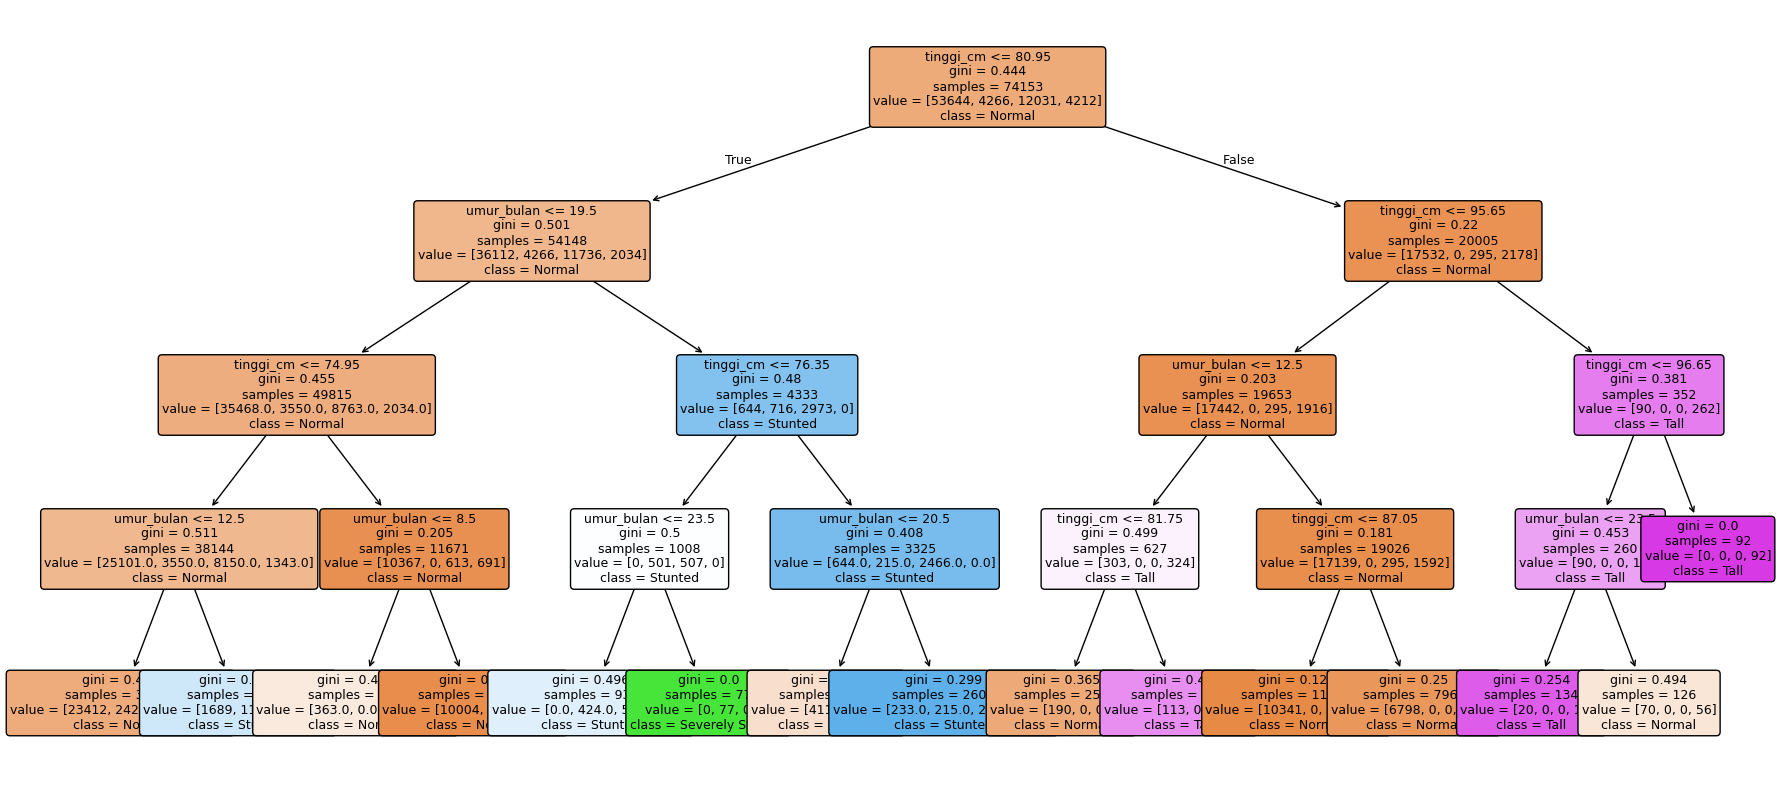

In [129]:
plt.figure(
    figsize=(22, 10)
)
plt_tree(
    dt,
    feature_names=feature_cols,
    class_names=stunting_classes,
    filled=True,
    rounded=True,
    fontsize=9,
)

# Feature Importance

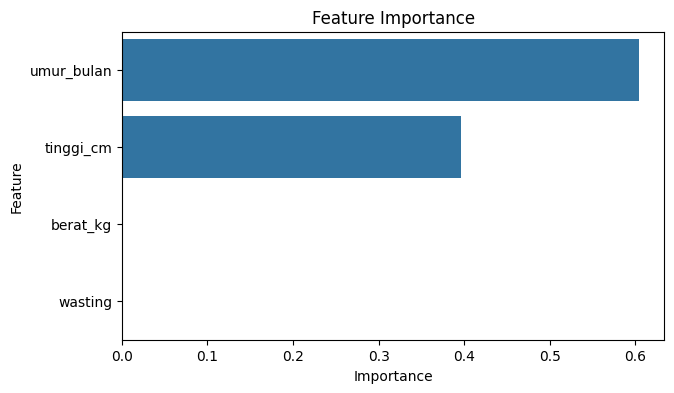

In [130]:
imp = pd.Series(
    dt.feature_importances_,
    index=feature_cols
).sort_values(
    ascending=False
)
plt.figure(
    figsize=(7, 4)
)
sns.barplot(
    x=imp,
    y=imp.index,
)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Hyperparameter Tuning

In [131]:
scores = {}
for d in range(2, nine := 9):
    m = DecisionTreeClassifier(
        criterion="gini", max_depth=d, random_state=42
    )
    m.fit(X_train, y_train)
    scores[d] = accuracy_score(y_test, m.predict(X_test))
    scores
    best_d = max(scores, key=scores.get)
    print("Best max_depth:", best_d, "with accuracy:", round(scores[best_d] * 100, 2), "%")













































































































































































































































































































































































    

Best max_depth: 2 with accuracy: 75.72 %
Best max_depth: 2 with accuracy: 75.72 %
Best max_depth: 4 with accuracy: 77.67 %
Best max_depth: 5 with accuracy: 78.4 %
Best max_depth: 6 with accuracy: 81.74 %
Best max_depth: 7 with accuracy: 82.38 %
Best max_depth: 8 with accuracy: 84.22 %
